## Exercise 12

The  filedat.txt contains sample bivariate data  (each line is a 2-dim random vector with components separated by a space), generated usingthe Gaussian Copula with some (unknown) marginals.

* Compute numerically and plot CDFs of the marginal distributions HINT: empirical CDFfor the sample with N elements:
$$P_\leq (x) =  \frac{number\_of\_elements\_in\_the\_sample \leq x}{N} = \frac{1}{N}\sum_{i=1}^N 1_{X_i<x} $$


* Estimate the (only) parameter of the 2-dim Gaussian Copula, i.e.the correlation coefficient $\rho$.

HINT: Using empirical marginal CDFs convert the sample datainto the 2-dim uniform distribution and then (using inverse Gaussian CDF) into the 2-dim Gaussian and compute the covariance $\rho$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="white", color_codes=True)

from copy import copy

PI = np.pi

%matplotlib inline

In [2]:
def empirical_cdf(x0, X):
    
    for i,x in enumerate(X):
        if x>x0:
            break
    
    return (i-1)/len(X)     

In [3]:
raw_data = pd.read_csv('dat.csv', sep=' ', names = ('z1', 'z2'))
Z1 = np.array(raw_data['z1'])
Z2 = np.array(raw_data['z2'])

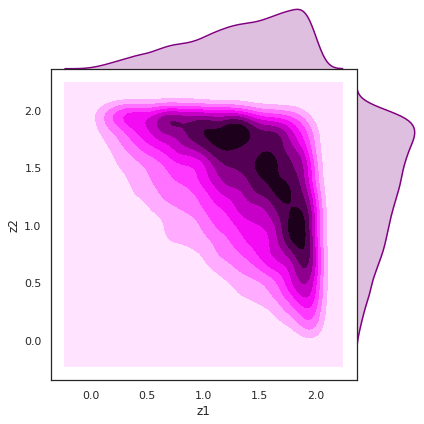

In [4]:
sns.jointplot("z1", "z2", data=raw_data, kind="kde", space=0, color="purple")

## Brute force - sort and plot (quite good for small number of samples)

In [5]:
Z1_sorted = copy(Z1)
Z2_sorted = copy(Z2)

Z1_sorted.sort()
Z2_sorted.sort()

CDF_Z1 = []
CDF_Z2 = []

for z1,z2 in zip(Z1,Z2):
    CDF_Z1.append(empirical_cdf(z1, Z1_sorted))
    CDF_Z2.append(empirical_cdf(z2, Z1_sorted))

(array([  4.,   6.,  10.,  10.,  12.,  12.,  13.,  12.,  19.,  19.,  20.,
         28.,  29.,  26.,  18.,  26.,  30.,  42.,  48.,  46.,  39.,  45.,
         41.,  49.,  49.,  45.,  41.,  58.,  56.,  63.,  69.,  65.,  61.,
         75.,  64.,  74.,  81.,  89.,  79.,  79., 103.,  85.,  95.,  80.,
         91.,  90., 101., 109., 100.,  81., 100., 111.,  98., 120., 101.,
        109., 116., 119., 110., 116., 122., 122., 125., 123., 129., 140.,
        122., 139., 150., 136., 118., 149., 153., 145., 138., 136., 147.,
        143., 147., 179., 167., 158., 135., 163., 165., 172., 205., 151.,
        191., 202., 186., 189., 173., 179., 187., 177., 172., 171., 209.,
        198.]),
 array([0.01100008, 0.03088876, 0.05077743, 0.07066611, 0.09055478,
        0.11044346, 0.13033214, 0.15022081, 0.17010949, 0.18999816,
        0.20988684, 0.22977551, 0.24966419, 0.26955287, 0.28944154,
        0.30933022, 0.32921889, 0.34910757, 0.36899625, 0.38888492,
        0.4087736 , 0.42866227, 0.44855095, 0.

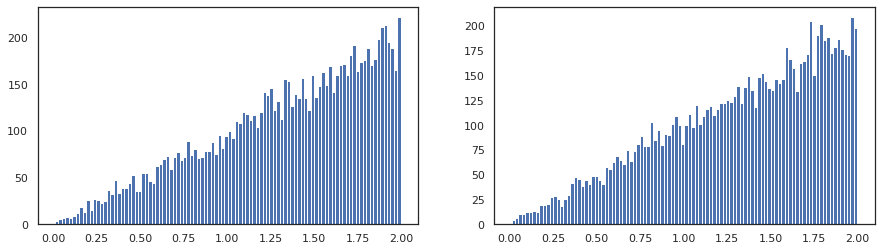

In [6]:
fig, axs = plt.subplots(ncols=2, figsize = (15,4))
axs[0].hist(Z1_sorted, bins = 100)
axs[1].hist(Z2_sorted, bins = 100)

,u1,u2
u1,1.000000,-0.488999
u2,-0.488999,1.000000


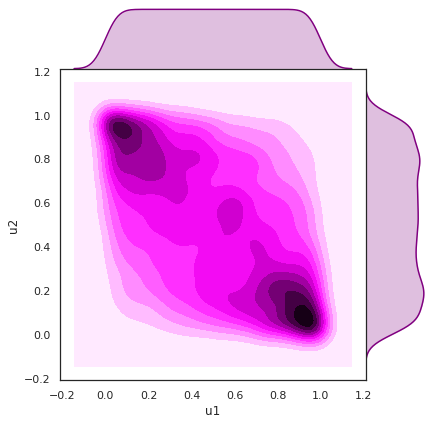

In [7]:
uniform = np.array([CDF_Z1, CDF_Z2]).T
df_uniform = pd.DataFrame(uniform, columns = ['u1','u2'])
sns.jointplot("u1", "u2", data=df_uniform, kind="kde", space=0, color="purple")

df_uniform.corr()

## Inverse Gauss CDF

In [8]:
from scipy.stats import norm
from scipy import special


## (two alternative functions)
def inverse_gauss(x):
    return  norm.ppf(x)
    #return -np.sqrt(2)* special.erfcinv(2*x)   

## Testing on non-correlated, 2D uniform distribution:

,u1,u2
u1,1.000000,0.008884
u2,0.008884,1.000000


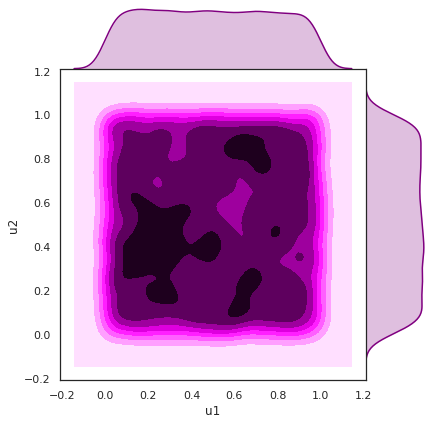

In [9]:
XX = np.random.uniform(0,1,10000)
YY = np.random.uniform(0,1,10000)

uniform = np.array([XX, YY]).T
df_uniform = pd.DataFrame(uniform, columns = ['u1','u2'])
sns.jointplot("u1", "u2", data=df_uniform, kind="kde", space=0, color="purple")

df_uniform.corr()

In [10]:
XX1 = []
XX2 = []

for u1,u2 in zip(XX, YY):
    XX1.append(inverse_gauss(u1))
    XX2.append(inverse_gauss(u2))

,x1,x2
x1,1.00000,0.00486
x2,0.00486,1.00000


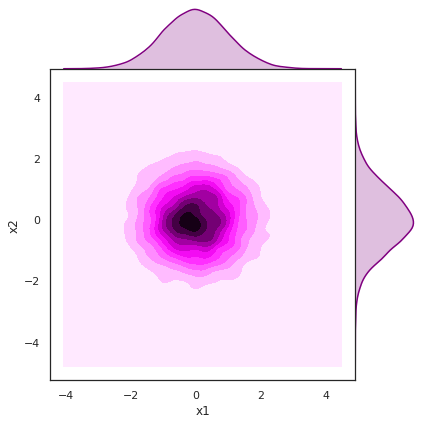

In [11]:
gauss = np.array([XX1, XX2]).T
gauss_cleared = gauss[~np.isinf(gauss).any(axis = 1)]

df_gauss = pd.DataFrame(gauss_cleared, columns = ['x1','x2'])
sns.jointplot("x1", "x2", data=df_gauss, kind="kde", space=0, color="purple")

df_gauss.corr()

## Inverse Gauss for 'our' 2D correlated distribution

In [12]:
X1 = []
X2 = []

for u1,u2 in zip(CDF_Z1, CDF_Z2):
    X1.append(inverse_gauss(u1))
    X2.append(inverse_gauss(u2))

,x1,x2
x1,1.000000,-0.503214
x2,-0.503214,1.000000


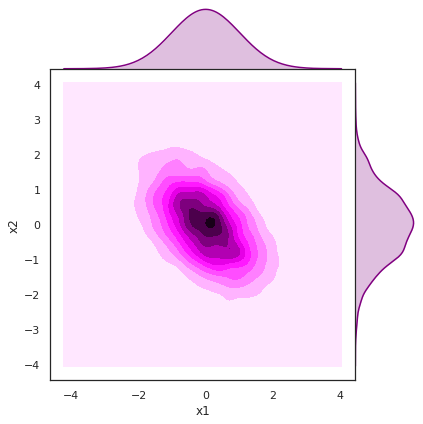

In [13]:
gauss = np.array([X1, X2]).T
gauss_cleared = gauss[~np.isinf(gauss).any(axis = 1)]

df_gauss = pd.DataFrame(gauss_cleared, columns = ['x1','x2'])
sns.jointplot("x1", "x2", data=df_gauss, kind="kde", space=0, color="purple")
df_gauss.corr()

## CHECKING THE SOLUTIONS

,x,y
x,1.000000,-0.485343
y,-0.485343,1.000000


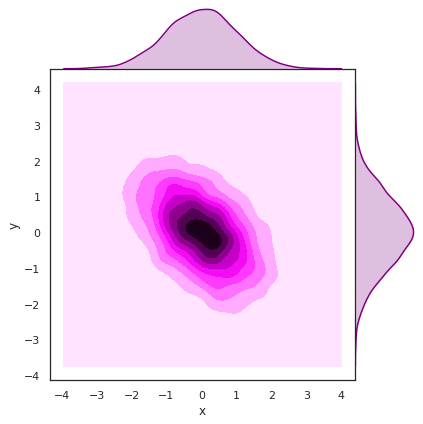

In [14]:
sigma_x = 1;
sigma_y = 1;
rho = -0.488999

mean = [0, 0]
cov = [[sigma_x**2, sigma_x*sigma_y*rho], [sigma_x*sigma_y*rho, sigma_y**2]]  # diagonal covariance
data = np.random.multivariate_normal(mean, cov, 5000)

df = pd.DataFrame(data, columns=['x','y'])
sns.jointplot("x", "y", data=df, kind="kde", space=0, color="purple")

df.corr()

,x,y
x,1.00000,-0.49489
y,-0.49489,1.00000


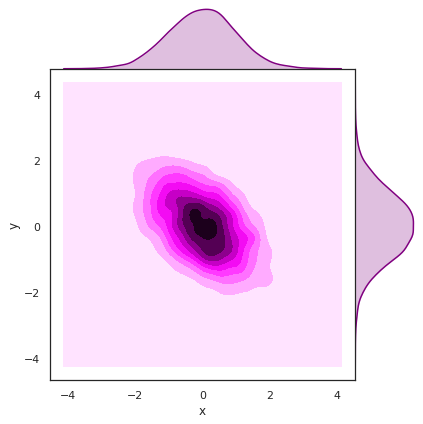

In [15]:
sigma_x = 1;
sigma_y = 1;
rho = -0.503214

mean = [0, 0]
cov = [[sigma_x**2, sigma_x*sigma_y*rho], [sigma_x*sigma_y*rho, sigma_y**2]]  # diagonal covariance
data = np.random.multivariate_normal(mean, cov, 5000)

df = pd.DataFrame(data, columns=['x','y'])
sns.jointplot("x", "y", data=df, kind="kde", space=0, color="purple")

df.corr()